# Environment

In [1]:
import pandas as pd
import yaml
import os
import sys
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load config
CONFIG_PATH = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment/config.yaml"

# Specify which configuration to use (1-based index)
# Change this to select different configurations
CONFIG_NUMBER = 6

with open(CONFIG_PATH, 'r') as f:
    # Load all documents from the YAML file
    configs = list(yaml.safe_load_all(f))

# Select the specific configuration (subtract 1 because list is 0-based)
config = configs[CONFIG_NUMBER - 1]

# Get values from the selected config
BASE_DIR = config['base_dir']
RUN_NAME = config['run_name']
CELL_TYPE = config['cell_type']
ALIGNMENT_TYPE = config['alignment_type']
PEAKS_TYPE = config['peaks_type']

ENRICHMENT_FILE = f"{BASE_DIR}/results/{ALIGNMENT_TYPE}/cpg_enrichment/{CELL_TYPE}/{PEAKS_TYPE}/{RUN_NAME}/cpg_enrichment_parallel.csv"
print(ENRICHMENT_FILE)

# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide DataFrames
pd.set_option('display.max_colwidth', None) # Don't truncate column contents

sys.path.append("/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment")
try:
    import functions
    importlib.reload(functions)
    from functions import *
except ModuleNotFoundError:
    print("Warning: Could not import functions module. Make sure functions.py exists in the code7_cpg_enrichment directory.")


/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/Neu/broad/cpg_enrichment_2_rep_in_cpg/cpg_enrichment_parallel.csv


# Load Data

In [2]:
# Load the CpG enrichment results
cpg_enrichment_df = pd.read_csv(ENRICHMENT_FILE)

In [3]:
# Display first few rows and basic info
print("DataFrame shape:", cpg_enrichment_df.shape)
print("\nFirst few rows:")
display(cpg_enrichment_df.head())
print("\nColumn names:")
print(cpg_enrichment_df.columns.tolist())

DataFrame shape: (13981, 32)

First few rows:


,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
0,chr1,3670619,3671074,455,613,CpG:,37.940533,39.747068,0.954549,0.5,exo_only,exo_only,False,3,1,3,2,"32.34496787354186,27.57420218541072,53.90242758321238","0.0,79.49413669711942",1,0,6.08946;8.05807;5.49517,12.1862,3670619,3671074,455,11.453576,39.747068,0.301882,1.000000,3,1
1,chr1,3671654,3672156,502,613,CpG:,91.426571,60.223449,1.518122,1.0,both,both,False,3,2,3,2,"65.91187516626609,100.02656144829861,108.34127548111387","8.037706496706047,112.40919069654913",1,1,6.08946;8.05807;5.49517,14.2013;12.1862,3671654,3672156,502,18.358166,52.185742,0.200797,0.866535,3,2
2,chr1,4571641,4572075,434,619,CpG:,22.484732,26.613610,0.844858,1.0,both,exo_only,False,3,2,3,2,"21.50187462705621,16.938446890923284,29.013874656044393","2.135811282742408,51.09140839994228",1,0,3.91321;3.39512;3.76449,4.05345,4571641,4572075,434,4.978520,24.477799,0.221418,0.919747,3,1
3,chr1,4785376,4785814,438,621,CpG:,145.674206,215.922890,0.674658,0.2,both,both,False,3,2,3,2,"129.91540476829493,143.84692270461827,163.26028948396308","212.77924754521618,219.0665323962904",1,1,11.1372;19.5773;9.32821,23.228;16.7278,4785376,4785814,438,13.674174,3.143642,0.093868,0.014559,3,2
4,chr1,4807559,4808103,544,621,CpG:,87.326720,97.583452,0.894893,1.0,both,both,False,3,2,3,2,"88.68880979629124,31.970723089049844,141.32062649025636","75.7557615111856,119.41114226597198",1,1,5.73973;10.656;7.12485,8.19533;7.28905,4807559,4808103,544,44.652300,21.827690,0.511325,0.223682,3,2



Column names:
['chr', 'start', 'end', 'cpg_length', 'cpg_name', 'cpg_score', 'exo_signal', 'endo_signal', 'enrichment', 'pvalue', 'binding_type', 'binding_type_by_peaks', 'significant', 'exo_replicates_with_signal', 'endo_replicates_with_signal', 'total_exo_replicates', 'total_endo_replicates', 'exo_replicate_signals', 'endo_replicate_signals', 'n_exo_peaks', 'n_endo_peaks', 'exo_peak_scores_by_rep', 'endo_peak_scores_by_rep', 'analysis_start', 'analysis_end', 'analysis_length', 'exo_signal_std', 'endo_signal_std', 'exo_signal_cv', 'endo_signal_cv', 'exo_replicates_with_peaks', 'endo_replicates_with_peaks']


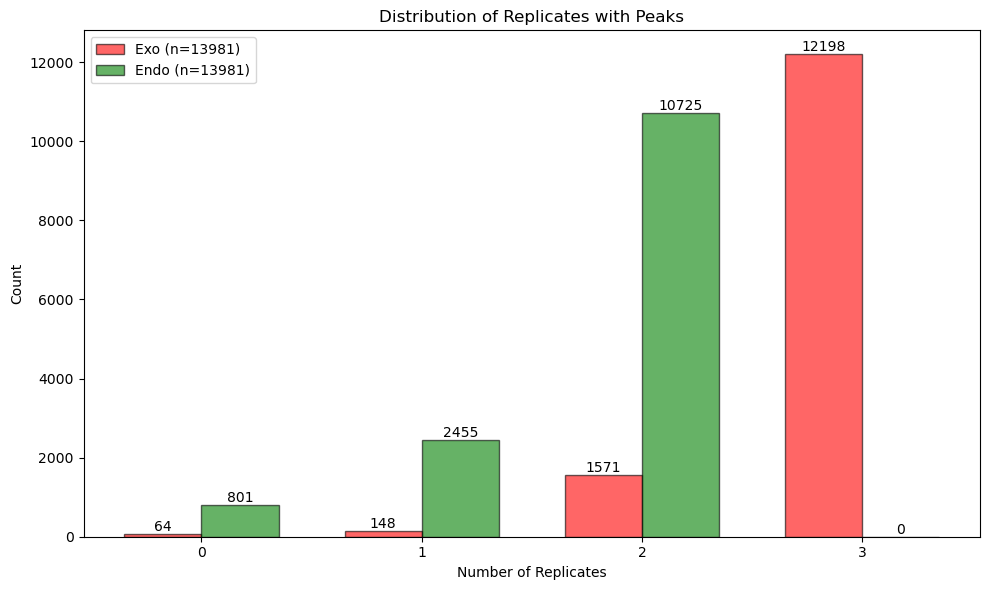

In [4]:
# Create single plot
plt.figure(figsize=(10, 6))

# Get data for plotting
x = np.arange(4)  # 0 through 3 replicates
exo_counts = [len(cpg_enrichment_df[cpg_enrichment_df['exo_replicates_with_peaks'] == i]) for i in range(4)]
endo_counts = [len(cpg_enrichment_df[cpg_enrichment_df['endo_replicates_with_peaks'] == i]) for i in range(4)]

# Plot bars side by side
width = 0.35
plt.bar(x - width/2, exo_counts, width, label=f'Exo (n={sum(exo_counts)})', color='red', alpha=0.6, edgecolor='black')
plt.bar(x + width/2, endo_counts, width, label=f'Endo (n={sum(endo_counts)})', color='green', alpha=0.6, edgecolor='black')

# Add value labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, exo_counts[i], str(exo_counts[i]), 
             ha='center', va='bottom')
    plt.text(x[i] + width/2, endo_counts[i], str(endo_counts[i]),
             ha='center', va='bottom')

plt.title('Distribution of Replicates with Peaks')
plt.xlabel('Number of Replicates')
plt.ylabel('Count')
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
# Sort the DataFrame by enrichment value in descending order
cpg_enrichment_df_sorted = cpg_enrichment_df.sort_values(by='enrichment', ascending=False)

# Split data based on binding type

## By signal value

Non zero signal in minumum 2 replicates

In [6]:
# Split data based on binding type
exo_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'exo_only']
endo_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'endo_only'] 
both_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_signal)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_signal)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_signal)}")


Number of CpG islands bound by exo only: 2234
Number of CpG islands bound by endo only: 14
Number of CpG islands bound by both: 11733


## By peaks number

Minimum 2 replicates with peaks

In [7]:
# Split data based on binding type
exo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'exo_only']
endo_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'endo_only'] 
both_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by exo only: {len(exo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by endo only: {len(endo_only_df_by_peaks)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_peaks)}")


Number of CpG islands bound by exo only: 3256
Number of CpG islands bound by endo only: 212
Number of CpG islands bound by both: 10513


# Data analysis

## Both: enrichment distribution

In [8]:
print("Summary statistics of enrichment values selected by signal:")
print(both_df_by_signal['enrichment'].describe())

print("\nSummary statistics of enrichment values selected by peaks:")
print(both_df_by_peaks['enrichment'].describe())

Summary statistics of enrichment values selected by signal:
count    11733.000000
mean         1.520878
std          2.609975
min          0.017670
25%          0.802636
50%          1.176351
75%          1.673059
max        110.534068
Name: enrichment, dtype: float64

Summary statistics of enrichment values selected by peaks:
count    1.051300e+04
mean              inf
std               NaN
min      4.174727e-02
25%      8.153901e-01
50%      1.173517e+00
75%      1.635343e+00
max               inf
Name: enrichment, dtype: float64


/beegfs/scratch/ric.broccoli/kubacki.michal/conda_envs/snakemake/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


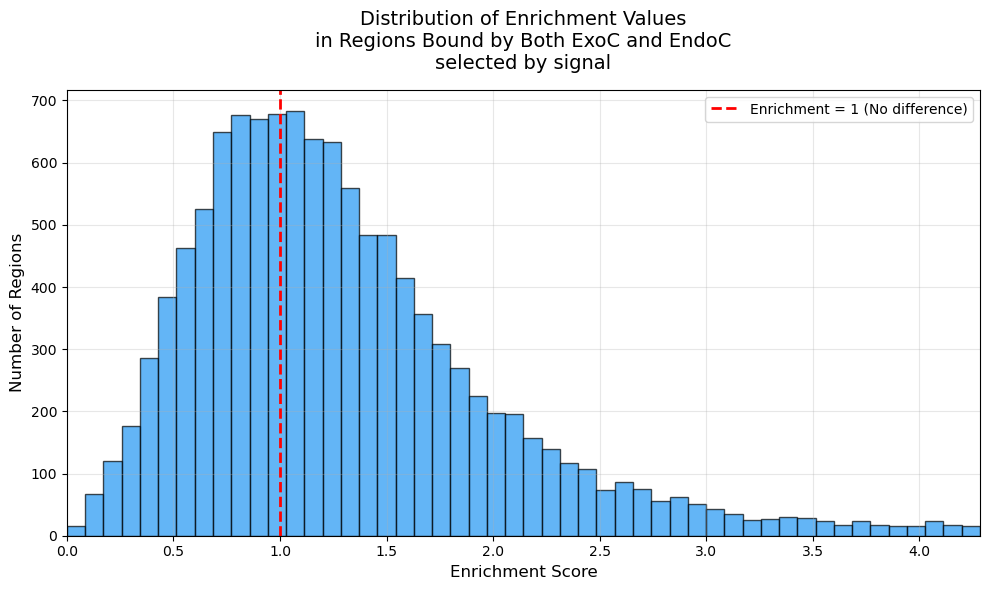

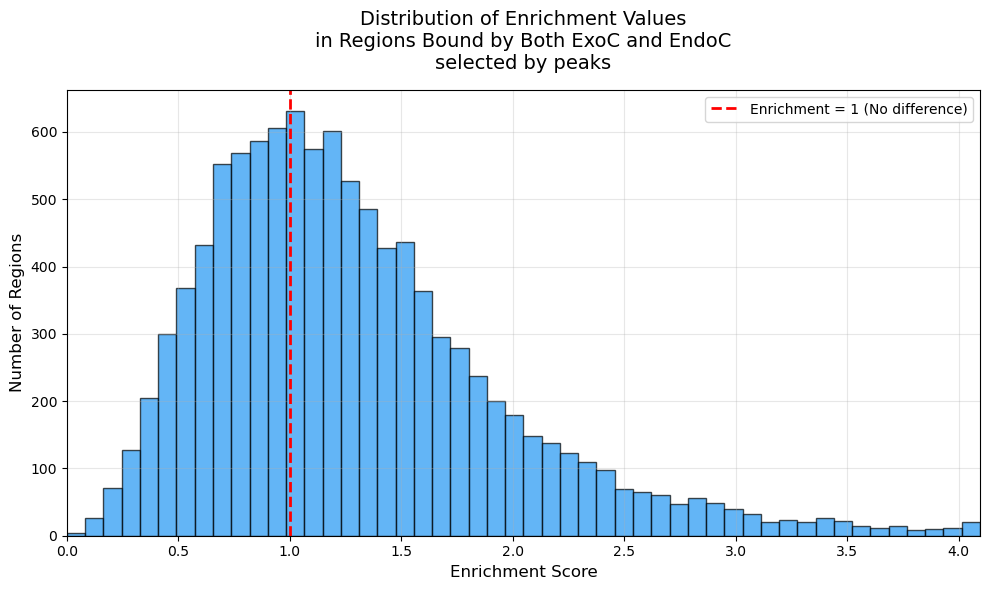

In [9]:
range_min_signal, range_max_signal = plot_enrichment_distribution(both_df_by_signal, title="selected by signal")
range_min_peaks, range_max_peaks = plot_enrichment_distribution(both_df_by_peaks, title="selected by peaks")


## Both: enrichment outliers

In [10]:
outliers_df_signal = both_df_by_signal[both_df_by_signal['enrichment'] > range_max_signal].copy()
print(f"\nNumber of outliers selected by signal(enrichment > {range_max_signal}):", len(outliers_df_signal))

outliers_df_peaks = both_df_by_peaks[both_df_by_peaks['enrichment'] > range_max_peaks].copy()
print(f"\nNumber of outliers selected by peaks(enrichment > {range_max_peaks}):", len(outliers_df_peaks))


Number of outliers selected by signal(enrichment > 4.284329011876341): 290

Number of outliers selected by peaks(enrichment > 4.095202846609988): 192


In [11]:
outliers_df_signal.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
12946,chr9,22055777,22056121,344,753,CpG:,66.226988,0.599155,110.534068,0.2,both,exo_only,False,3,2,3,2,"22.209243368270787,69.23994989173357,107.23177133604537","0.1533927363018657,1.0449163303818814",1,1,10.8096;16.9561;12.3881,14.3277,22055777,22056121,344,34.775624,0.445762,0.525097,0.743985,3,1
7856,chr2,181147685,181148173,488,1967,CpG:,31.611928,0.327785,96.441036,0.2,both,exo_only,False,3,2,3,2,"3.4322548987435515,14.324450608159674,77.07907848670834","0.12615061197124544,0.529419451463418",1,0,2.84979;11.0449,NaN,181147685,181148173,488,32.456189,0.201634,1.026707,0.615142,2,0
1819,chr11,60476668,60477169,501,1046,CpG:,50.409949,0.738844,68.228148,0.2,both,exo_only,False,3,2,3,2,"46.624925152746265,75.44750582529399,29.1574168995231","0.13692036288940979,1.3407673911896056",1,0,4.53753;3.73461;3.40885,NaN,60476668,60477169,501,19.086433,0.601924,0.378624,0.814683,3,0
13256,chr9,70141053,70141727,674,1120,CpG:,81.376820,1.281073,63.522400,0.2,both,exo_only,False,3,2,3,2,"81.8445512703689,59.62421915580681,102.66168812545187","1.9755034508620242,0.5866421563689008",1,0,5.62158;13.1784;7.89364,6.41486,70141053,70141727,674,17.573086,0.694431,0.215947,0.542070,3,1
4310,chr15,67175470,67175675,205,1097,CpG:,28.624932,0.457467,62.572659,0.2,both,both,False,3,2,3,2,"35.90873588003763,6.32956628101628,43.6364943341511","0.25740000096763055,0.657534180617914",1,1,9.78355;17.39;9.39556,13.379;16.4591,67175470,67175675,205,16.077771,0.200067,0.561670,0.437337,3,2


In [12]:
print_outlier_groups(outliers_df_signal, "signal")


First 5 outliers selected by signal:
chr9:22,055,777-22,056,121                        enrichment: 110.53406844690362
chr2:181,147,685-181,148,173                      enrichment: 96.44103585892644
chr11:60,476,668-60,477,169                       enrichment: 68.2281478659741
chr9:70,141,053-70,141,727                        enrichment: 63.52240035659669
chr15:67,175,470-67,175,675                       enrichment: 62.572658757731546

Middle 5 outliers selected by signal:
chr2:127,584,568-127,584,792                      enrichment: 6.384949292909344
chr7:5,080,074-5,080,680                          enrichment: 6.354179809450662
chr4:41,497,500-41,499,385                        enrichment: 6.339088565471609
chr13:96,132,369-96,132,813                       enrichment: 6.312656215620508
chr6:82,939,460-82,939,736                        enrichment: 6.258938778173274

Last 5 outliers selected by signal:
chr2:163,472,210-163,472,708                      enrichment: 4.293310126119749
chr10

In [13]:
n_rows = len(outliers_df_signal)

print("\nFirst 5 outliers selected by signal:")
for _, row in outliers_df_signal[:5].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

if n_rows > 10:
    mid_start = n_rows//2 - 2
    print("\nMiddle 5 outliers selected by signal:")
    for _, row in outliers_df_signal[mid_start:mid_start+5].iterrows():
        print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

print("\nLast 5 outliers selected by signal:")
for _, row in outliers_df_signal[-5:].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")


First 5 outliers selected by signal:
chr9:22,055,777-22,056,121                        enrichment: 110.53406844690362
chr2:181,147,685-181,148,173                      enrichment: 96.44103585892644
chr11:60,476,668-60,477,169                       enrichment: 68.2281478659741
chr9:70,141,053-70,141,727                        enrichment: 63.52240035659669
chr15:67,175,470-67,175,675                       enrichment: 62.572658757731546

Middle 5 outliers selected by signal:
chr2:127,584,568-127,584,792                      enrichment: 6.384949292909344
chr7:5,080,074-5,080,680                          enrichment: 6.354179809450662
chr4:41,497,500-41,499,385                        enrichment: 6.339088565471609
chr13:96,132,369-96,132,813                       enrichment: 6.312656215620508
chr6:82,939,460-82,939,736                        enrichment: 6.258938778173274

Last 5 outliers selected by signal:
chr2:163,472,210-163,472,708                      enrichment: 4.293310126119749
chr10

In [14]:
print_outlier_groups(outliers_df_peaks, "peaks")


First 5 outliers selected by peaks:
chr17:83,215,491-83,215,722                       enrichment: inf
chr17:47,594,793-47,595,003                       enrichment: inf
chr8:70,505,755-70,506,064                        enrichment: inf
chr7:27,446,440-27,446,740                        enrichment: inf
chr1:89,928,656-89,928,995                        enrichment: inf

Middle 5 outliers selected by peaks:
chr2:129,593,195-129,593,678                      enrichment: 6.084853917185378
chr8:71,950,999-71,951,295                        enrichment: 6.021804954120176
chr19:41,895,893-41,896,185                       enrichment: 5.915725852290845
chr11:53,859,024-53,859,418                       enrichment: 5.886153317434524
chr8:86,624,084-86,624,579                        enrichment: 5.883427364272003

Last 5 outliers selected by peaks:
chr2:119,742,275-119,743,425                      enrichment: 4.136019447979239
chr8:84,969,409-84,969,759                        enrichment: 4.125239666210377

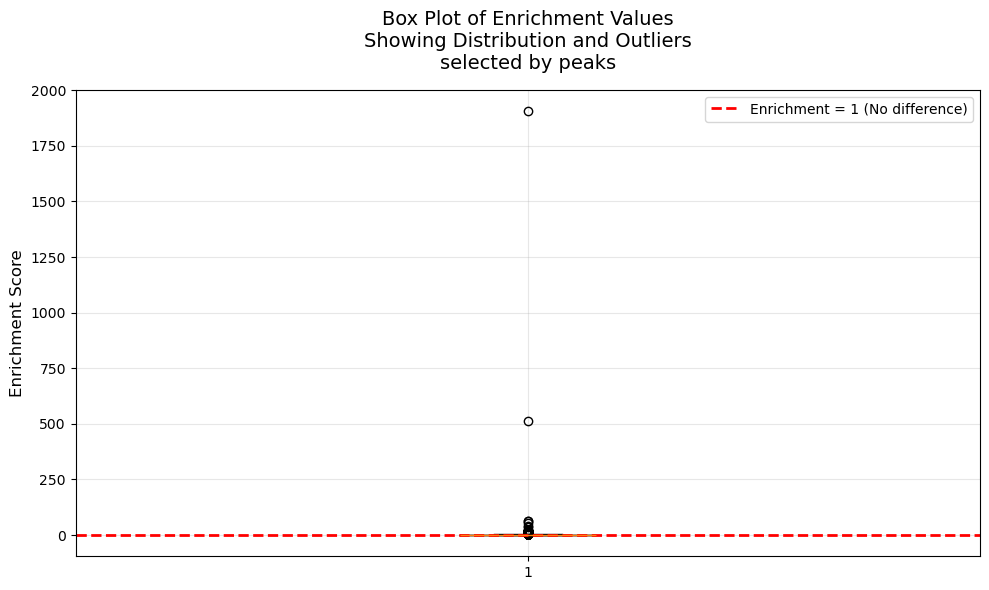

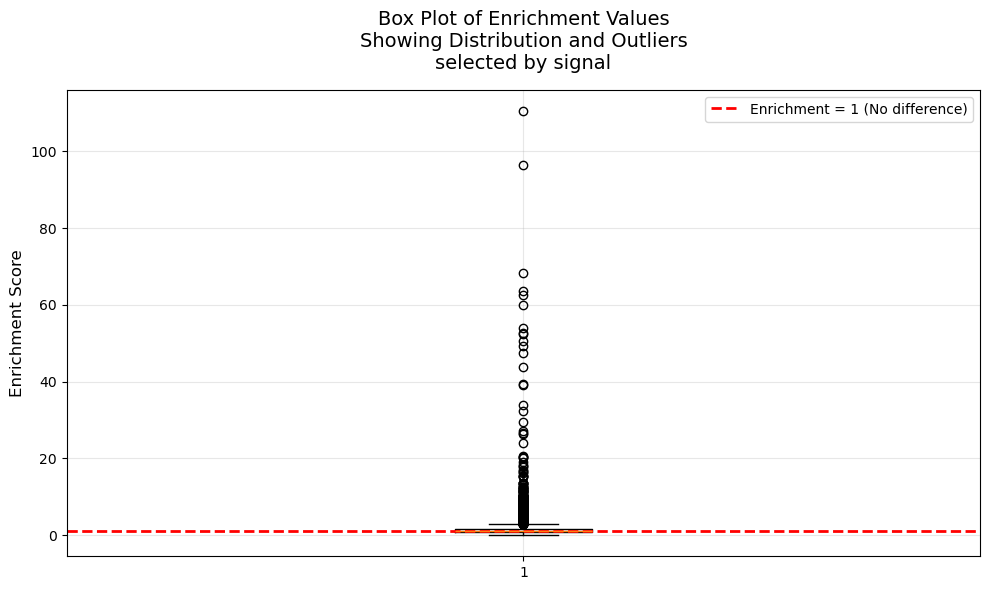

In [15]:
plot_enrichment_boxplot(both_df_by_peaks, title="selected by peaks")
plot_enrichment_boxplot(both_df_by_signal, title="selected by signal")

In [16]:
outliers_df_signal["endo_replicates_with_peaks"].value_counts()

signal_endo_zero_peaks  = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 0]
signal_endo_one_peaks   = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 1]
signal_endo_two_peaks   = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 2]
signal_endo_three_peaks = outliers_df_signal[outliers_df_signal["endo_replicates_with_peaks"] == 3]

outliers_df_peaks["endo_replicates_with_peaks"].value_counts()

peaks_endo_zero_peaks  = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 0]
peaks_endo_one_peaks   = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 1]
peaks_endo_two_peaks   = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 2]
peaks_endo_three_peaks = outliers_df_peaks[outliers_df_peaks["endo_replicates_with_peaks"] == 3]

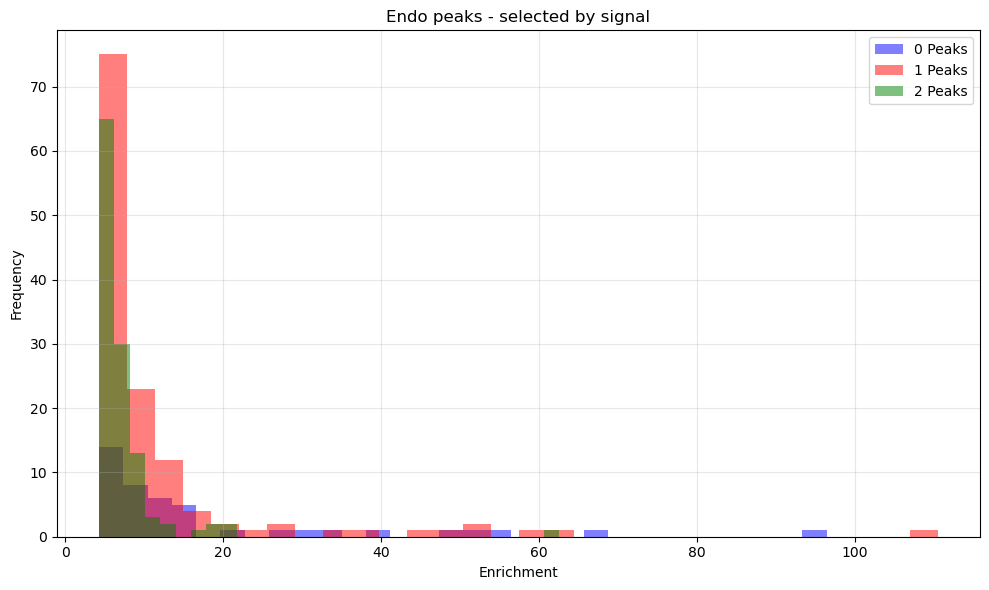

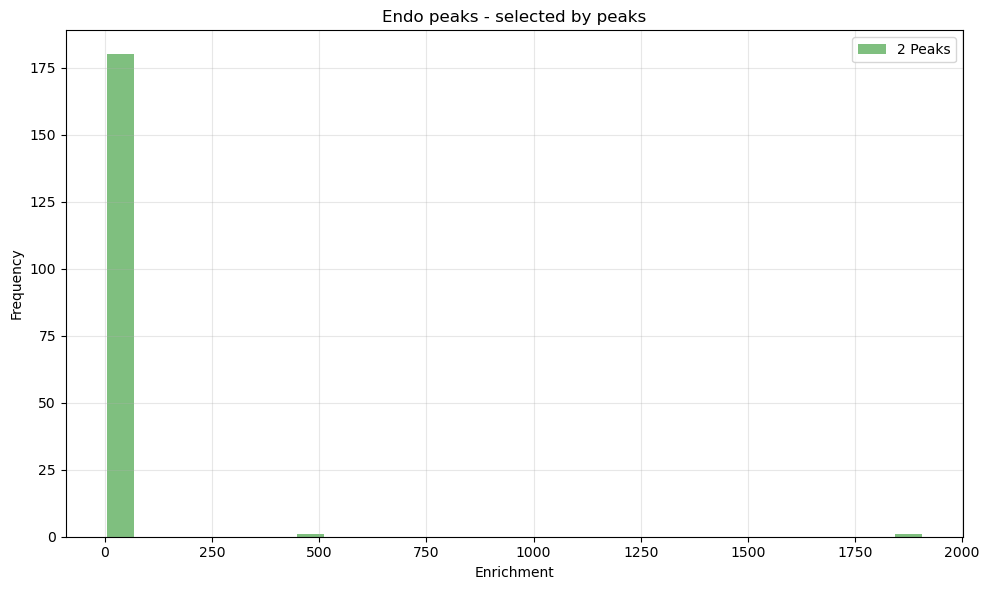

In [17]:
# Classify and plot for signal and peaks outliers
peaks_zero_peaks_signal, peaks_one_peaks_signal, peaks_two_peaks_signal, peaks_three_peaks_signal = plot_by_peaks(outliers_df_signal, peaks_column='endo_replicates_with_peaks', title="Endo peaks - selected by signal")
peaks_zero_peaks_peaks, peaks_one_peaks_peaks, peaks_two_peaks_peaks, peaks_three_peaks_peaks = plot_by_peaks(outliers_df_peaks, peaks_column='endo_replicates_with_peaks', title="Endo peaks - selected by peaks")

In [18]:
print_outlier_groups(peaks_two_peaks_peaks, "peaks")


First 5 outliers selected by peaks:
chr17:83,215,491-83,215,722                       enrichment: inf
chr17:47,594,793-47,595,003                       enrichment: inf
chr8:70,505,755-70,506,064                        enrichment: inf
chr7:27,446,440-27,446,740                        enrichment: inf
chr1:89,928,656-89,928,995                        enrichment: inf

Middle 5 outliers selected by peaks:
chr2:129,593,195-129,593,678                      enrichment: 6.084853917185378
chr8:71,950,999-71,951,295                        enrichment: 6.021804954120176
chr19:41,895,893-41,896,185                       enrichment: 5.915725852290845
chr11:53,859,024-53,859,418                       enrichment: 5.886153317434524
chr8:86,624,084-86,624,579                        enrichment: 5.883427364272003

Last 5 outliers selected by peaks:
chr2:119,742,275-119,743,425                      enrichment: 4.136019447979239
chr8:84,969,409-84,969,759                        enrichment: 4.125239666210377

In [19]:
print_outlier_groups(peaks_two_peaks_signal, "signal")


First 5 outliers selected by signal:
chr15:67,175,470-67,175,675                       enrichment: 62.572658757731546
chr12:84,617,242-84,617,489                       enrichment: 20.71472650916875
chr9:114,026,623-114,026,853                      enrichment: 20.22801404902156
chr15:79,670,759-79,671,374                       enrichment: 18.163050650188364
chr16:31,933,753-31,934,042                       enrichment: 18.120548902882938

Middle 5 outliers selected by signal:
chr5:143,269,472-143,270,105                      enrichment: 5.805699174140903
chr7:45,706,651-45,707,060                        enrichment: 5.788527297316413
chr18:13,971,238-13,971,610                       enrichment: 5.725363441142962
chr2:163,644,701-163,645,273                      enrichment: 5.484640337913953
chr3:134,235,994-134,236,297                      enrichment: 5.450341544526928

Last 5 outliers selected by signal:
chr19:4,201,535-4,201,770                         enrichment: 4.302485836592477
chr

## IGV: examples

## Regions length distribution

### CpG length - defined by the CpG coordinates

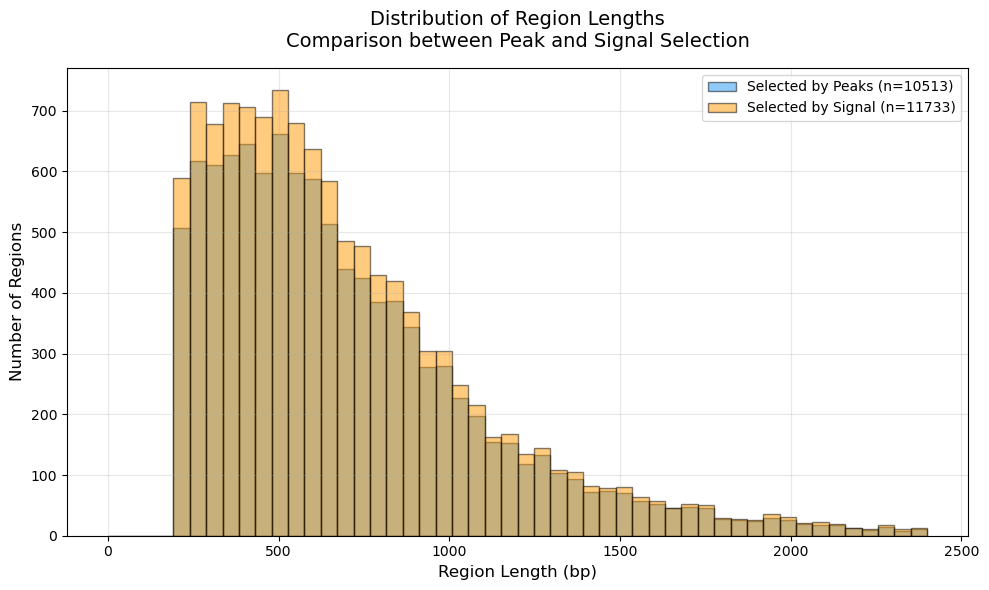

In [20]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='cpg_length')

In [21]:
both_df_sorted_by_cpg_length_peaks = both_df_by_peaks.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_peaks.head()
print_outlier_groups(both_df_sorted_by_cpg_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr8:92,355,697-92,360,826                        enrichment: 0.8508029354291498
chrX:12,086,982-12,092,060                        enrichment: 1.183767499358089
chrX:12,076,861-12,081,915                        enrichment: 1.2249947719191188
chr17:34,118,396-34,122,981                       enrichment: 1.1590557534442023
chr8:87,958,428-87,962,795                        enrichment: 0.933231442573048

Middle 5 outliers selected by peaks:
chrX:8,145,265-8,145,872                          enrichment: 0.9068130958492284
chr18:44,661,646-44,662,253                       enrichment: 2.008669783445145
chr15:58,214,479-58,215,086                       enrichment: 2.8580380410919606
chr5:86,172,427-86,173,034                        enrichment: 1.9818234415054865
chr1:14,506,541-14,507,148                        enrichment: 0.5017373155731523

Last 5 outliers selected by peaks:
chr1:135,532,492-135,532,693                      enrichment: 0.4804614784090206
c

In [22]:
both_df_sorted_by_cpg_length_signal = both_df_by_signal.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_signal.head()
print_outlier_groups(both_df_sorted_by_cpg_length_signal, "signal")


First 5 outliers selected by signal:
chr8:92,355,697-92,360,826                        enrichment: 0.8508029354291498
chr5:33,430,439-33,435,552                        enrichment: 0.6103361362211098
chrX:12,086,982-12,092,060                        enrichment: 1.183767499358089
chrX:12,076,861-12,081,915                        enrichment: 1.2249947719191188
chr17:34,118,396-34,122,981                       enrichment: 1.1590557534442023

Middle 5 outliers selected by signal:
chr7:109,169,528-109,170,130                      enrichment: 0.4832406339956651
chr5:76,588,594-76,589,196                        enrichment: 0.8414833649178816
chr8:70,609,252-70,609,854                        enrichment: 1.5812066099565776
chr7:125,444,606-125,445,208                      enrichment: 1.3521839461109624
chr2:155,691,846-155,692,448                      enrichment: 0.9699677851897234

Last 5 outliers selected by signal:
chr6:83,572,297-83,572,498                        enrichment: 1.4822848707770

### IGV: examples

# Exo only

In [23]:
exo_only_df_by_peaks.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
6953,chr2,31637900,31638106,206,826,CpG:,24.268788,0.0,inf,1.0,exo_only,exo_only,False,3,0,3,2,"8.363084177369053,14.384249520533293,50.05902984767284","0.0,0.0",0,0,3.72114;3.43905,NaN,31637900,31638106,206,18.401378,0.0,0.758232,0.0,2,0
3341,chr13,43200971,43201218,247,914,CpG:,24.835596,0.0,inf,1.0,exo_only,exo_only,False,3,0,3,2,"34.37293127963417,30.526412712900264,9.607445319171859","0.0,0.0",1,0,3.34233;3.8717,5.35199,43200971,43201218,247,10.881831,0.0,0.438155,0.0,2,1
8122,chr3,88332967,88333238,271,1258,CpG:,49.642334,0.0,inf,1.0,exo_only,exo_only,False,3,0,3,2,"44.14707960149899,37.04215192618845,67.73777039728482","0.0,0.0",1,0,3.80949;4.61303;3.71216,NaN,88332967,88333238,271,13.120051,0.0,0.264292,0.0,3,0
12878,chr9,15627862,15628112,250,704,CpG:,71.120963,0.0,inf,1.0,exo_only,exo_only,False,3,0,3,2,"21.281579292297362,56.979525955200195,135.10178246307373","0.0,0.0",1,0,4.07826;8.6256;3.37821,NaN,15627862,15628112,250,47.530656,0.0,0.668307,0.0,3,0
8124,chr3,88365848,88366065,217,1259,CpG:,20.617325,0.0,inf,1.0,exo_only,exo_only,False,2,0,3,2,"49.76240467475856,12.089569698281002,0.0","0.0,0.0",1,0,8.59937;3.86587,NaN,88365848,88366065,217,21.191448,0.0,1.027847,0.0,2,0


In [24]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'cpg_length', 'pvalue']

stats_df = exo_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("Exo only - by peaks, size:", len(exo_only_df_by_peaks))
stats_df

Exo only - by peaks, size: 3256


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,3256.000000,3256.000000,2845.000000,3256.000000,3256.000000
mean,37.274872,19.713714,11.543771,545.685811,0.709971
std,39.370669,24.929238,114.727620,377.577216,0.283847
min,0.987281,0.000000,0.035240,201.000000,0.200000
25%,15.941707,2.805823,1.015567,287.000000,0.500000
50%,26.447867,11.917474,1.930293,434.000000,0.800000
75%,44.650312,26.765851,4.516763,667.250000,1.000000
max,761.133378,238.998013,5368.168927,5113.000000,1.000000


In [25]:
stats_df = exo_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("Exo only - by signal, size:", len(exo_only_df_by_signal))
stats_df

Exo only - by signal, size: 2234


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,2234.000000,2234.000000,1810.000000,2234.000000,2234.000000
mean,33.865670,14.016451,17.840491,476.957475,0.763653
std,32.352744,18.984879,150.682507,311.187166,0.242402
min,0.300588,0.000000,0.033745,201.000000,0.500000
25%,14.637184,0.789330,1.197089,265.000000,0.500000
50%,24.740001,7.297020,2.441677,373.000000,1.000000
75%,41.750917,19.830416,6.432295,568.750000,1.000000
max,495.584118,179.021675,5368.168927,3089.000000,1.000000


In [26]:
print_across_distribution(exo_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr2:31,637,900-31,638,106                        enrichment: inf
chr13:43,200,971-43,201,218                       enrichment: inf
chr3:88,332,967-88,333,238                        enrichment: inf
chr9:15,627,862-15,628,112                        enrichment: inf
chr3:88,365,848-88,366,065                        enrichment: inf

Middle 5 elements selected by peaks:
chr11:57,827,496-57,828,164                       enrichment: 2.3328394757313786
chr2:155,629,338-155,629,701                      enrichment: 2.3320209648913925
chr13:63,240,027-63,240,320                       enrichment: 2.330244113882007
chrX:169,994,005-169,994,235                      enrichment: 2.3294103781664965
chr8:120,100,983-120,101,870                      enrichment: 2.3273098142245376

Last 5 elements selected by peaks:
chr11:96,997,301-96,997,682                       enrichment: 0.1090899389463776
chr9:91,361,457-91,361,732                        enrichment: 0.1028986746

In [27]:
print_across_distribution(exo_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr2:31,637,900-31,638,106                        enrichment: inf
chr13:43,200,971-43,201,218                       enrichment: inf
chr3:88,332,967-88,333,238                        enrichment: inf
chr9:15,627,862-15,628,112                        enrichment: inf
chr3:88,365,848-88,366,065                        enrichment: inf

Middle 5 elements selected by signal:
chr9:32,409,218-32,409,639                        enrichment: 3.708626882652784
chr1:106,712,493-106,712,947                      enrichment: 3.702399437270588
chr8:94,913,065-94,913,767                        enrichment: 3.695889957991328
chr5:147,862,417-147,862,696                      enrichment: 3.694366479112909
chr14:105,895,076-105,895,323                     enrichment: 3.691167957195995

Last 5 elements selected by signal:
chrX:133,686,621-133,687,857                      enrichment: 0.130357517538263
chr9:91,361,457-91,361,732                        enrichment: 0.102898674632

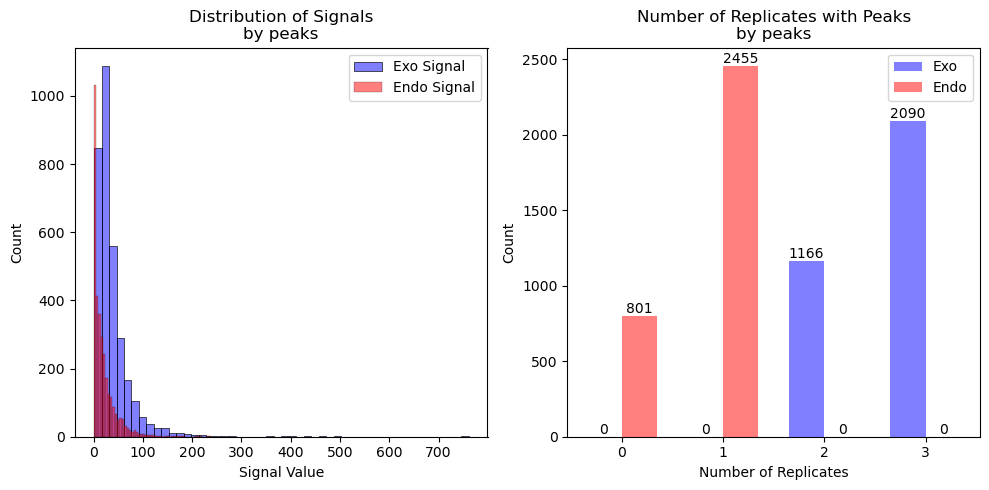

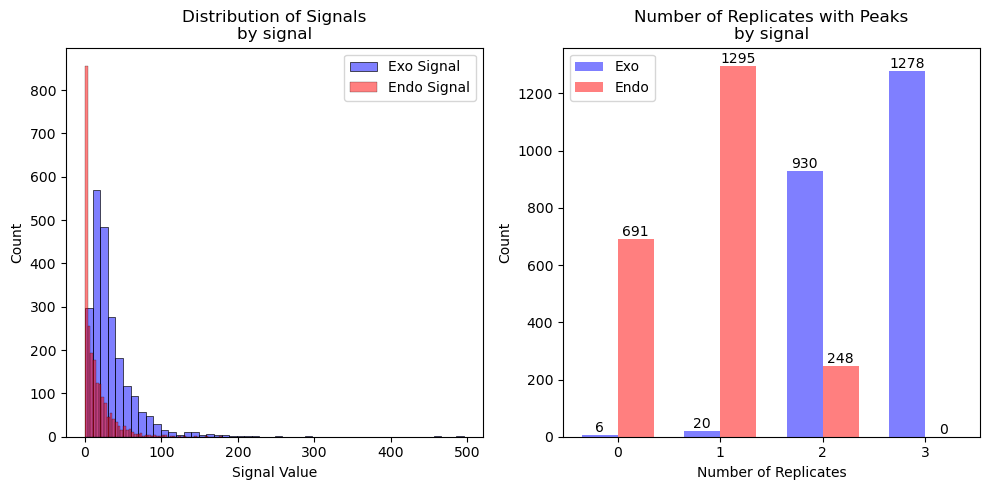

In [28]:
plot_exo_only_distributions_no_length_distribution(exo_only_df_by_peaks, title="by peaks")
plot_exo_only_distributions_no_length_distribution(exo_only_df_by_signal, title="by signal")

# Endo only

In [29]:
endo_only_df_by_peaks.head()

,chr,start,end,cpg_length,cpg_name,cpg_score,exo_signal,endo_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,exo_replicates_with_signal,endo_replicates_with_signal,total_exo_replicates,total_endo_replicates,exo_replicate_signals,endo_replicate_signals,n_exo_peaks,n_endo_peaks,exo_peak_scores_by_rep,endo_peak_scores_by_rep,analysis_start,analysis_end,analysis_length,exo_signal_std,endo_signal_std,exo_signal_cv,endo_signal_cv,exo_replicates_with_peaks,endo_replicates_with_peaks
12781,chr8,122282660,122282861,201,1517,CpG:,0.300588,0.000000,inf,1.0,exo_only,endo_only,False,2,0,3,2,"0.0,0.12911099580983024,0.7726542392180333","0.0,0.0",0,1,NaN,33.2235;26.3204,122282660,122282861,201,0.337937,0.000000,1.124251,0.000000,0,2
10232,chr5,139553163,139553452,289,1649,CpG:,2.973485,0.000000,inf,1.0,exo_only,endo_only,False,2,0,3,2,"6.389816439275511,2.530637381398554,0.0","0.0,0.0",0,1,NaN,8.49039;3.77035,139553163,139553452,289,2.627359,0.000000,0.883596,0.000000,0,2
6639,chr19,47178603,47179636,1033,944,CpG:,3.341906,0.000000,inf,1.0,exo_only,endo_only,False,2,0,3,2,"5.837156685370328,4.188561361503047,0.0","0.0,0.0",0,1,2.66116,4.62441;7.22503,47178603,47179636,1033,2.457060,0.000000,0.735227,0.000000,1,2
10313,chr5,146584687,146585123,436,1703,CpG:,11.576006,0.471471,24.552977,0.5,exo_only,endo_only,False,3,1,3,2,"14.701409344279439,11.698635556282253,8.327973186422925","0.0,0.9429411242861266",0,1,3.65673,9.21342;6.3981,146584687,146585123,436,2.603389,0.471471,0.224895,1.000000,1,2
12091,chr8,13201140,13201353,213,685,CpG:,45.475510,3.369334,13.496884,0.8,both,endo_only,False,3,2,3,2,"4.837085367928089,1.80540484665705,129.78403942126064","3.047114244649108,3.691553957585438",0,1,9.80932,4.74928;5.81816,13201140,13201353,213,59.627979,0.322220,1.311211,0.095633,1,2


In [30]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['exo_signal', 'endo_signal', 'enrichment', 'cpg_length', 'pvalue']

stats_df = endo_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("endo only - by peaks, size:", len(endo_only_df_by_peaks))
stats_df

endo only - by peaks, size: 212


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,212.000000,212.000000,209.000000,212.000000,212.000000
mean,9.707570,27.847958,0.769875,625.627358,0.579717
std,7.167058,21.166661,2.057636,588.965893,0.292998
min,0.000000,0.000000,0.000000,201.000000,0.200000
25%,4.924493,11.894886,0.181457,293.500000,0.333333
50%,7.959971,23.096197,0.380203,438.500000,0.666667
75%,12.800768,37.393354,0.752402,687.750000,0.800000
max,45.475510,146.047823,24.552977,3882.000000,1.000000


In [31]:
stats_df = endo_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("endo only - by signal, size:", len(endo_only_df_by_signal))
stats_df

endo only - by signal, size: 14


,exo_signal,endo_signal,enrichment,cpg_length,pvalue
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,3.398251,34.343203,0.134870,323.714286,0.809524
std,2.765538,20.854697,0.136808,135.140058,0.171184
min,0.000000,13.590204,0.000000,203.000000,0.666667
25%,1.072708,23.077597,0.027435,211.250000,0.666667
50%,3.151831,30.569202,0.103986,257.500000,0.666667
75%,6.125538,40.042664,0.185016,454.750000,1.000000
max,7.345953,96.832667,0.480764,587.000000,1.000000


In [32]:
print_across_distribution(endo_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr8:122,282,660-122,282,861                      enrichment: inf
chr5:139,553,163-139,553,452                      enrichment: inf
chr19:47,178,603-47,179,636                       enrichment: inf
chr5:146,584,687-146,585,123                      enrichment: 24.55297734046488
chr8:13,201,140-13,201,353                        enrichment: 13.4968835128388

Middle 5 elements selected by peaks:
chr15:82,987,200-82,987,524                       enrichment: 0.398149859365511
chr5:24,598,539-24,598,982                        enrichment: 0.3941325944441331
chr1:6,359,082-6,359,442                          enrichment: 0.3897405426598082
chr12:117,533,752-117,534,427                     enrichment: 0.380202695570796
chr13:23,745,100-23,745,491                       enrichment: 0.3748103117727054

Last 5 elements selected by peaks:
chr4:65,124,446-65,124,914                        enrichment: 0.0197199154606952
chr18:53,462,842-53,463,091                     

In [33]:
print_across_distribution(endo_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr7:13,037,443-13,037,683                        enrichment: 0.4807644927582762
chr8:121,073,543-121,073,839                      enrichment: 0.3270666708944241
chr7:19,577,199-19,577,670                        enrichment: 0.1923742527397193
chr7:80,026,984-80,027,571                        enrichment: 0.1862028254490901
chr13:74,292,231-74,292,439                       enrichment: 0.1814574686625635

Middle 5 elements selected by signal:
chr11:118,891,228-118,891,637                     enrichment: 0.1596876518351663
chr4:119,521,076-119,521,318                      enrichment: 0.1045603883418341
chr3:66,973,459-66,973,929                        enrichment: 0.1034112526131426
chr15:102,966,501-102,966,713                     enrichment: 0.075596269330145
chr15:78,718,605-78,718,878                       enrichment: 0.0417472650082619

Last 5 elements selected by signal:
chr15:78,718,605-78,718,878                       enrichment: 0.0417472650082

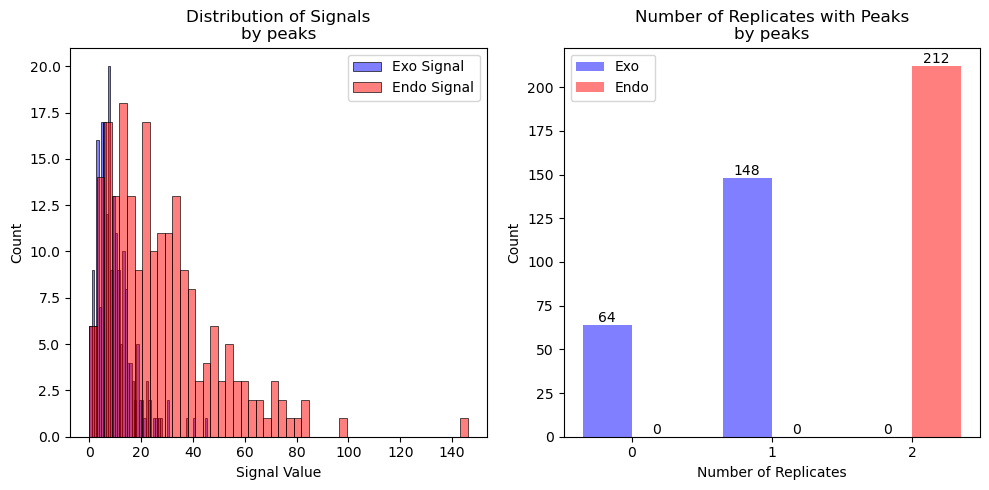

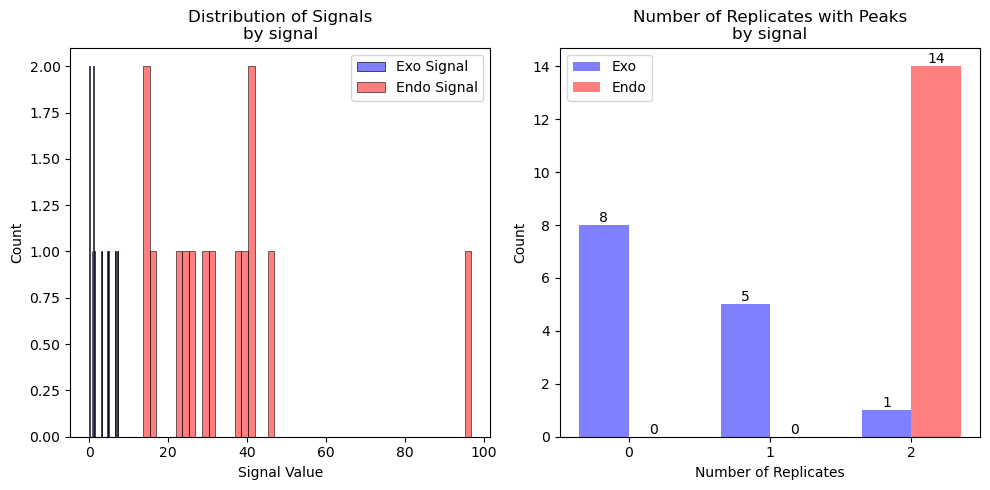

In [34]:
plot_exo_only_distributions_no_length_distribution(endo_only_df_by_peaks, title="by peaks")
plot_exo_only_distributions_no_length_distribution(endo_only_df_by_signal, title="by signal")